## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [19]:
df = pd.read_csv('aptos.csv')





In [20]:
df.dtypes


metros        int64
valor         int64
quartos       int64
vagas         int64
reformado     int64
bairro       object
dtype: object

In [21]:
df.head(100)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
...,...,...,...,...,...,...
95,100,422,3,2,1,Baeta Neves
96,105,659,3,2,1,Rudge Ramos
97,55,200,2,0,1,Iraja
98,53,220,2,1,1,Santa Teresinha


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   ..:.Metros: metros quadrados de área.
-   ..:.Valor: Valor do apartamento multiplicado por mil EX: 560 seria 560 mil reais.
-   ..:.Quartos: quantidade de quartos por apartamento.
-   ..:.Vagas: quantidade de vagas por apartamento.
-   ..:.Reformado: Se o apartamento foi reformado ou não.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  ...Eu acho que o valor dos apartamentos varia de acordo com o tamanho em metros quadrados e a localização 
2.  ...Eu acho que a quantidade de quartos e vagas e se o apartamento foi reformado influencia no valor da compra

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

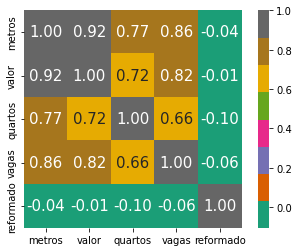

In [23]:
df.shape


cols = ['metros', 'valor', 'quartos','vagas', 'reformado']
corr_matx = df[cols].corr()
heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')


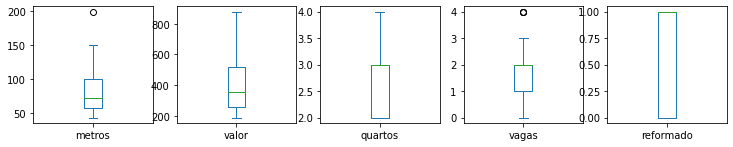

In [ ]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(15, 15))
plt.show()





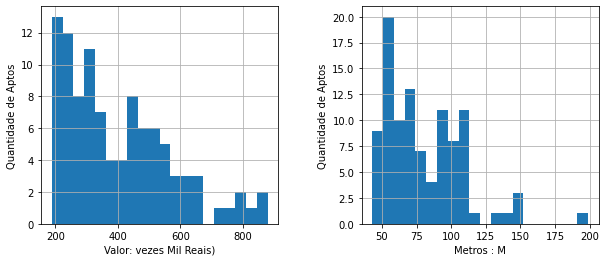

In [ ]:

import numpy as np
x = np.array(df["valor"])
y = np.array(df["metros"])

n_bins = 20


fig, axs = plt.subplots(1, 2)
2
fig.set_size_inches(10, 4) 

axs[0].hist(x, bins=n_bins) 
axs[1].hist(y, bins=n_bins)



axs[0].set_xlabel('Valor: vezes Mil Reais)')
axs[1].set_xlabel('Metros : M')

axs[0].set_ylabel('Quantidade de Aptos')
axs[1].set_ylabel('Quantidade de Aptos')


axs[0].grid()
axs[1].grid()



plt.subplots_adjust(wspace = 0.35)

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo ...Regressão Linear
2. algoritimo ...Árvore de decisão

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Regressão Linear:
Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão. A reta resume esses dados, o que é útil quando fazemos previsões.


2. Árvore de decisão: a árvore de decisão estabelece nós que se relacionam entre si por uma hierarquia. Existe o nó-raize os nós-folha, que são os resultados finais. No contexto de m achine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [24]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['bairro']= label_encoder.fit_transform(df['bairro']) 
print(df.head(10))

   metros  valor  quartos  vagas  reformado  bairro
0     107    560        3      2          0      16
1     107    555        3      2          1      16
2      49    196        2      1          0       4
3     104    515        3      2          1       2
4      92    560        3      2          1      16
5      51    249        2      1          0      15
6     140    635        4      3          1       2
7      50    210        2      1          1       3
8      93    450        3      2          0       1
9     107    425        3      2          1      13


In [25]:
from sklearn.linear_model import LinearRegression 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Escolhendo as colunas preditivas e alvo
x = df[['metros','quartos','vagas','bairro']] # Colunas descritivas
y = df['valor']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [30]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

In [31]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lr.predict(x_test) 

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [33]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.8263991602531433


In [34]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

0.8561225318186706


### Algoritmo 2

In [35]:
#Seu Código aqui..#Importa biblioteca
#Importa outras bibliotecas necessárias como pandas, numpy...
from sklearn import tree
#Assume que você tem X (preditor) e Y (alvo) para dados de treino e x_test(predictor) dos dados de teste
# Cria o objeto tree
model = tree.DecisionTreeRegressor(random_state = 0) 
# Para classificação, aqui você pode mudar o algoritmo para gini ou para entropy (Ganho de informação). Por default é gini  
# model = tree.DecisionTreeRegressor() para regressão
# Treina o modelo usando os dados de treino e de teste confere o score
model.fit(x, y)
model.score(x, y)
#Prevê o resultado
predicted= model.predict(x_test)







In [36]:


model.fit(x_train,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

DecisionTreeRegressor(random_state=0)

In [37]:
y_predicoes = model.predict(x_test) 

In [38]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.8369422693917437


In [39]:
R2_treinamento = model.score(x_train, y_train)
print(R2_treinamento)

0.9876398798114552


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.826 | 0.987 |
| teste  | 0.856 | 0.836 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta: O segundo algorítmo obteve uma  precisão maior, quanto mais próximo de 1, melhor o resultado.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [40]:
df.head

<bound method NDFrame.head of     metros  valor  quartos  vagas  reformado  bairro
0      107    560        3      2          0      16
1      107    555        3      2          1      16
2       49    196        2      1          0       4
3      104    515        3      2          1       2
4       92    560        3      2          1      16
..     ...    ...      ...    ...        ...     ...
95     100    422        3      2          1       1
96     105    659        3      2          1      13
97      55    200        2      0          1       6
98      53    220        2      1          1      14
99      58    200        2      1          0      14

[100 rows x 6 columns]>

NameError: ignored

## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Acredito que sim,  conseguimos ver que os principais valores determinandes para o preço dos apartamentos são 
seu tamanho em m², numero de quartos e vagas. e obtivemos um resultado  de R2 muito próximo a 1 

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:




